# Digital SawitPro - Data Scientist Assignment

## Introduction

Assignment by Arvin Assanny

Here is my [Dashboard](https://public.tableau.com/views/SawitProAssignment/Covid-19Analysis?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

## Import Library
First we import our library that needed in this assignment

In [1]:
#Importing Pandas and Numpy Library
import pandas as pd
import numpy as np

#Importing Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Warning filtering
import warnings
warnings.filterwarnings('ignore')

#Setting this notebook to show all data
pd.set_option('display.max_columns', None)
pd.reset_option('max_columns')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Loading Data
We only have one dataset, which is a dataset about covid infection from one world in data.

In [2]:
# Load main data
df = pd.read_csv('owid-covid-data.csv')

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.122,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260562,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,NaN,NaN,5663.0,0.0,0.143,16171.096,NaN,NaN,346.986,0.0,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
260563,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,NaN,NaN,5663.0,0.0,0.143,16171.096,NaN,NaN,346.986,0.0,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
260564,ZWE,Africa,Z

It looks like that we have so many missing value.

## Data Describe

In [4]:
print('Main Data Shape:', df.shape)

Main Data Shape: (260567, 67)


our dataset is quite big with 67 columns and 260567 rows

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260567 entries, 0 to 260566
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    260567 non-null  object 
 1   continent                                   245944 non-null  object 
 2   location                                    260567 non-null  object 
 3   date                                        260567 non-null  object 
 4   total_cases                                 246027 non-null  float64
 5   new_cases                                   245704 non-null  float64
 6   new_cases_smoothed                          244500 non-null  float64
 7   total_deaths                                226322 non-null  float64
 8   new_deaths                                  226220 non-null  float64
 9   new_deaths_smoothed                         225034 non-null  float64
 

Our data is mainly consist of numerical columns, with only 5 are considered a categorical type.

In [56]:
df.isnull().sum()

iso_code                                           0
continent                                      14623
location                                           0
date                                               0
total_cases                                    14540
new_cases                                      14863
new_cases_smoothed                             16067
total_deaths                                   34245
new_deaths                                     34347
new_deaths_smoothed                            35533
total_cases_per_million                        15657
new_cases_per_million                          15980
new_cases_smoothed_per_million                 17179
total_deaths_per_million                       35349
new_deaths_per_million                         35451
new_deaths_smoothed_per_million                36632
reproduction_rate                              75750
icu_patients                                  225862
icu_patients_per_million                      

As predicted we have so many missing value.

## Data Cleaning

In [6]:
dup = df.duplicated(keep = False).sum()
print('Total Duplicate:', dup)

Total Duplicate: 0


We want to check if our data has duplicate, looks like we don't have any.

In [7]:
df_filtered = df.fillna(0)

To simplyfy things, we decided to fill our missing value with 0 value.

In [8]:
df_filtered.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,0.122,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,0.122,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,0.122,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,0.122,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,0.122,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis

In [9]:
print('The earliest date: ', df_filtered.date.min())
print('The latest date: ', df_filtered.date.max())

The earliest date:  2020-01-01
The latest date:  2023-02-27


Our latest data do not included march 2023 yet, so for this analysis we will use the latest date which is 2023-02-27

## Answer Question

### Q1. What is the probability of dying from COVID infection in France in March 2023 for a 25 year old? Draw the relevant correlation projections

In [22]:
france_data = df_filtered[df_filtered['location'] == 'France']
france_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
81469,FRA,Europe,France,2020-01-24,2.0,2.0,0.000,0.0,0.0,0.000,0.029,0.029,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,5.56,122.578,42.0,19.718,13.079,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901,67813000.0,0.0,0.00,0.00,0.00000
81470,FRA,Europe,France,2020-01-25,3.0,1.0,0.000,0.0,0.0,0.000,0.044,0.015,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,5.56,122.578,42.0,19.718,13.079,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901,67813000.0,0.0,0.00,0.00,0.00000
81471,FRA,Europe,France,2020-01-26,3.0,0.0,0.000,0.0,0.0,0.000,0.044,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,5.56,122.578,42.0,19.718,13.079,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901,67813000.0,-3599.6,-6.61,-7.74,-55.82502
81472,FRA,Europe,France,2020-01-27,3.0,0.0,0.000,0.0,0.0,0.000,0.044,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,5.56,122.578,42.0,19.718,13.079,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901,67813000.0,0.0,0.00,0.00,0.00000
81473,FRA,Europe,France,2020-01-28,4.0,1.0,0.000,0.0,0.0,0.000,0.059,0.015,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,5.56,122.578,42.0,19.718,13.079,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901,67813000.0,0.0,0.00,0.00,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82595,FRA,Europe,France,2023-02-23,39645138.0,4489.0,3798.143,164917.0,19.0,23.429,584624.453,66.197,56.009,2431.938,0.280,0.345,0.0,733.0,10.809,12991.0,191.571,190.0,2.802,2036.0,30.024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,154296813.0,54657920.0,53166637.0,47554483.0,5260.0,4185.0,227.53,80.6,78.4,70.13,62.0,212.0,0.0,0.00,122.578,42.0,19.718,13.079,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901,67813000.0,0.0,0.00,0.00,0.00000
82596,FRA,Europe,France,2023-02-24,39649055.0,3917.0,3845.000,164946.0,29.0,23.571,584682.214,57.762,56.700,2432.365,0

First we filter our data to only include france

In [19]:
france_data[['date', 'total_cases', 'total_deaths']].sort_values('total_cases', ascending=False)

,date,total_cases,total_deaths
82599,2023-02-27,39656681.0,164998.0
82598,2023-02-26,39649055.0,164946.0
82597,2023-02-25,39649055.0,164946.0
82596,2023-02-24,39649055.0,164946.0
82595,2023-02-23,39645138.0,164917.0
...,...,...,...
81473,2020-01-28,4.0,0.0
81471,2020-01-26,3.0,0.0
81470,2020-01-25,3.0,0.0
81472,2020-01-27,3.0,0.0


Now we do some query using pandas to retrive the result we want, which is to know total deaths and total cases.

We realized that the question want us to calculate the probabilty of a 25 year old for dying of covid, but since we don't have an accurate data, we will make a simulation instead.

But first we will try to find the probabilty of a person to die of covid for all age groups.

In [24]:
# calculate the newest total number of COVID cases and deaths 
cases = france_data[(france_data['date'] == '2023-02-27')]['total_cases'].sum()
deaths = france_data[(france_data['date'] == '2023-02-27')]['total_deaths'].sum()

# calculate the probability of a person dying from COVID in France
prob_death = (deaths / cases) * 100

print(f"The probability of a person dying from COVID in France from the newest data is {prob_death:.2f}%")

The probability of a person dying from COVID in France from the newest data is 0.42%


Assume that 20% of COVID-19 cases in France occur in people aged 20-29.
This is just an assumption for illustration purposes and may not reflect the actual age distribution

In [43]:
age_dist = {'0-19': 0.15, '20-29': 0.20, '30-39': 0.20, '40-49': 0.15, '50-59': 0.15, '60-69': 0.10, '70-79': 0.05, '80+': 0.00}
cfr_25 = age_dist['20-29'] * prob_death

# Calculate the probability of dying from COVID-19 for a 25-year-old in France
probability_25 = cfr_25 * 100

# Print the result
print(f'The probability of dying from COVID-19 in France for a 25-year-old individual is {probability_25:.2f}%')

The probability of dying from COVID-19 in France for a 25-year-old individual is 8.32%


By now we have a rough calculation, of the probability of dying from COVID-19 in France for a 25-year-old. But we have to make sure that, this is purely for illustration only.

### Q2. What is the correlation between the number of deaths with age for the US, China, France and Germany?

In [37]:
# Filter the data to include only the relevant countries
countries = ['United States', 'China', 'France', 'Germany']
country_data = df_filtered.loc[df_filtered['location'].isin(countries)]
country_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
46965,CHN,Asia,China,2020-01-22,547.0,0.0,0.000,17.0,0.0,0.000,0.384,0.000,0.000,0.012,0.000,0.000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.39,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,0.0,4.34,76.91,0.761,1.425887e+09,0.0,0.0,0.0,0.0
46966,CHN,Asia,China,2020-01-23,639.0,92.0,0.000,18.0,1.0,0.000,0.448,0.065,0.000,0.013,0.001,0.000,3.04,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.91,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,0.0,4.34,76.91,0.761,1.425887e+09,0.0,0.0,0.0,0.0
46967,CHN,Asia,China,2020-01-24,916.0,277.0,0.000,26.0,8.0,0.000,0.642,0.194,0.000,0.018,0.006,0.000,3.28,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.91,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,0.0,4.34,76.91,0.761,1.425887e+09,0.0,0.0,0.0,0.0
46968,CHN,Asia,China,2020-01-25,1399.0,483.0,0.000,42.0,16.0,0.000,0.981,0.339,0.000,0.029,0.011,0.000,3.50,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.69,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,0.0,4.34,76.91,0.761,1.425887e+09,0.0,0.0,0.0,0.0
46969,CHN,Asia,China,2020-01-26,2062.0,663.0,0.000,56.0,14.0,0.000,1.446,0.465,0.000,0.039,0.010,0.000,3.59,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.91,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,0.0,4.34,76.91,0.761,1.425887e+09,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246038,USA,North America,United States,2023-02-23,103355819.0,55659.0,39328.000,1119508.0,621.0,374.000,305524.441,164.531,116.255,3309.316,1.836,1.106,0.00,2898.0,8.567,22295.0,65.905,0.0,0.0,25070.0,74.108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,0.0,2.77,78.86,0.926,3.382899e+08,0.0,0.0,0.0,0.0
246039,USA,North America,United States,2023-02-24,103370619.0,14800.0,34628.143,1119546.0,38.0,276.714,305568.190,43.749,102.362,3309.428,0.112,0.818,0.00,2836.0,8.383,21926

For this question, we will filter the data first to only include the countries we needed.

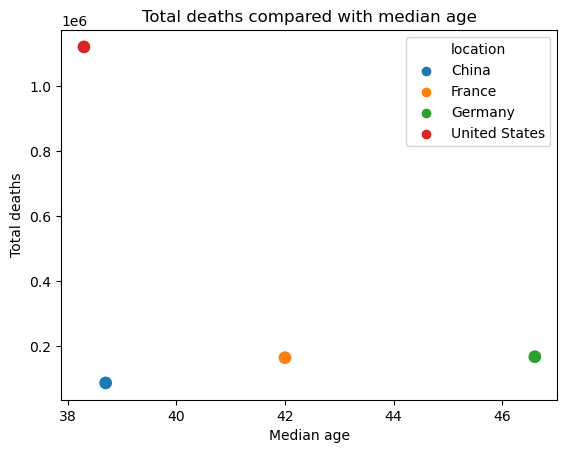

In [49]:
# Compute the total deaths and median age for each country
total_deaths = country_data.groupby('location')['total_deaths'].max()
median_age = country_data.groupby('location')['median_age'].max()

# Draw a scatterplot of total deaths and median age
sns.scatterplot(x=median_age, y=total_deaths, hue=total_deaths.index, s=100)
plt.xlabel('Median age')
plt.ylabel('Total deaths')
plt.title('Total deaths compared with median age')
plt.show()

From this plot, we can say that total deaths does not have a clear correlation or realtionship with age. We know that the US has the highest total death, but their median age is the lowest one. But at the same time, China has lower median age, but their total death are lower than germany which has higher median age by up to 8 years.

So we can say, that there is clear correlation between age and total death.

## Conclusion

From these question we can say that:
* We don't have the data for March 2023 yet, so we choose to use the latest data which is 27 February 2023.
* We want to know the probability of dying from COVID-19 in France for a 25-year-old, but since we don't have the detailed death person from covid belong to which age group we can not calculate the probability accurately.
* Instead, we try to make simmulation, to predict the death rate.
* From the question number two, we make a plot to shows us the relationship between age and total death, but since we only have median age to represent age group in this data. We can say that, we don't really know the accurate number because of this.